In [53]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt

##### Load image

In [54]:
shoulder_img = cv2.imread('shoulder.jpg', cv2.IMREAD_GRAYSCALE)

##### Display image

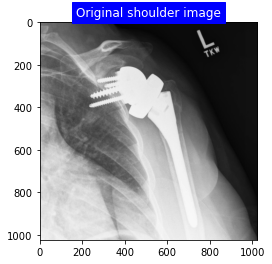

In [55]:
plt.title('Original shoulder image', color='white', backgroundcolor='blue')
plt.imshow(shoulder_img, cmap = 'gray')

##### Define fourier transform function

In [56]:
def fourier_transform(img):
    _fft = np.fft.fft2(img)
    # shift zero-frequency component to the center  
    fourier_image = np.fft.fftshift(_fft)
    return fourier_image

##### Define inverse fourier transform function

In [57]:
def inverse_fourier_trans(fourier_im):
    centered_img = np.fft.ifftshift(fourier_im)
    inverse_fourier = np.fft.ifft2(centered_img)
    return inverse_fourier

In [58]:
def plot_fourier_t(original_image, fourier_image):
    # calculate log scaled magnitude of the image
    magnitude = np.abs(fourier_image)
    log_magnitude = np.log(magnitude + 1)
    # calculate the phase of the image
    phase = np.angle(fourier_image)

    # Plot
    fig = plt.figure(figsize=(15, 10))
    gs = fig.add_gridspec(1, 4)

    # Original transform
    ax2 = fig.add_subplot(gs[0, 0])
    ax2.imshow(original_image, cmap='gray')
    ax2.set_title('Original image', color='white', backgroundcolor='blue')

    # Fourier transform
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.imshow(magnitude, cmap='gray')
    ax2.set_title('Magnitude image', color='white', backgroundcolor='blue')

    # Log scaled magnitude
    ax2 = fig.add_subplot(gs[0, 2])
    ax2.imshow(log_magnitude, cmap='gray')
    ax2.set_title('Log scaled magnitude', color='white', backgroundcolor='blue')

    # Phase
    ax2 = fig.add_subplot(gs[0, 3])
    ax2.imshow(phase, cmap='gray')
    ax2.set_title('Phase', color='white', backgroundcolor='blue')

##### Display results

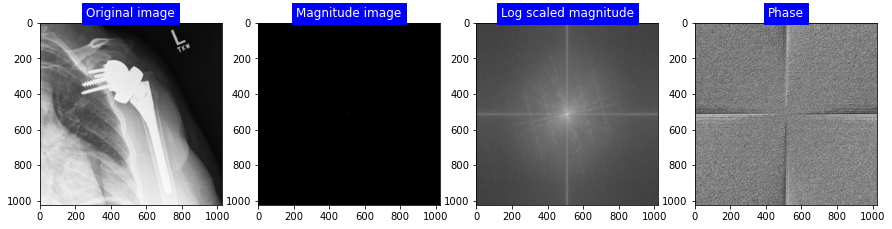

In [59]:
fourier_img = fourier_transform(shoulder_img)
plot_fourier_t(shoulder_img, fourier_img)

In [60]:
print(fourier_img.shape)

(1024, 1024)


### Notable equations

#### The function to calculate the distance between u and v is as follows:

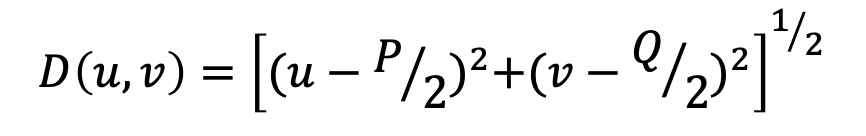

#### Ideal LPF formula:

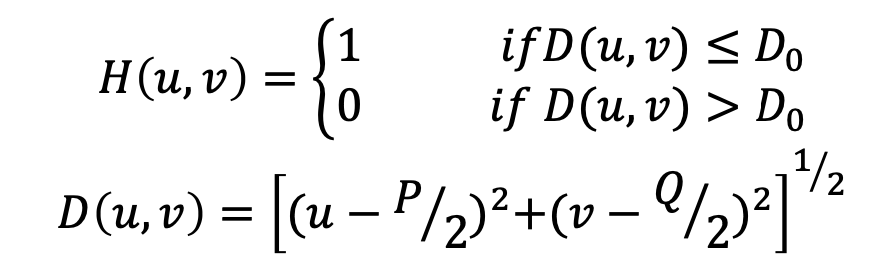

#### Butterworth LPF formula:

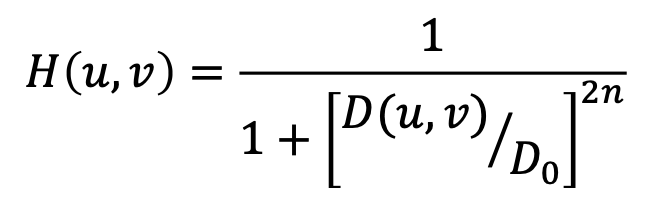

#### Gaussian LPF formula:

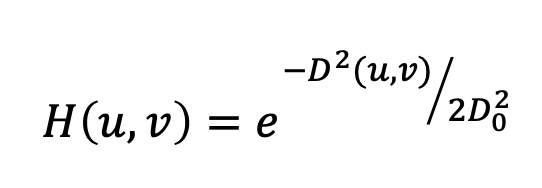

In [61]:
def calc_distance(u, v, shape):
    P, Q = shape[0], shape[1]
    return math.sqrt(math.pow((u - P//2), 2) + math.pow((v - Q//2), 2))

In [62]:
def apply_filters(original_image, filter_type, filter_params, n=None):
    shape = original_image.shape
    filter = np.zeros(shape, dtype=np.float32)
    complement = np.ones(shape)

    # detect filter type
    if 'ideal' in filter_type:
        for i in range(shape[0]):
            for j in range(shape[1]):
                filter[i, j] = 0 if calc_distance(i, j, shape) >= filter_params else 1
    elif 'butterworth' in filter_type:
        for i in range(shape[0]):
            for j in range(shape[1]):
                filter[i, j] = 1/(1 + math.pow((calc_distance(i, j, shape)/filter_params), 2*n))

    elif 'gaussian' in filter_type:
        for i in range(shape[0]):
            for j in range(shape[1]):
                filter[i, j] =  math.exp(-math.pow(calc_distance(i, j, shape), 2) / (2 * math.pow(filter_params, 2)))

    # high-pass or low-pass
    if 'LP' in filter_type:
        return filter
    else:
        return complement - filter

#### Low-pass filters

In [63]:
# radius = 50
ideal_50 = apply_filters(shoulder_img, 'LP_ideal', 50)*fourier_img
bw_50 = apply_filters(shoulder_img, 'LP_butterworth', 50, n=2)*fourier_img
gaussian_50 = apply_filters(shoulder_img, 'LP_gaussian', 50)*fourier_img

# radius = 100
ideal_100 = apply_filters(shoulder_img, 'LP_ideal', 100)*fourier_img
bw_100 = apply_filters(shoulder_img, 'LP_butterworth', 100, n=2)*fourier_img
gaussian_100 = apply_filters(shoulder_img, 'LP_gaussian', 100)*fourier_img

# radius = 200
ideal_200 = apply_filters(shoulder_img, 'LP_ideal', 200)*fourier_img
bw_200 = apply_filters(shoulder_img, 'LP_butterworth', 200, n=2)*fourier_img
gaussian_200 = apply_filters(shoulder_img, 'LP_gaussian', 200)*fourier_img

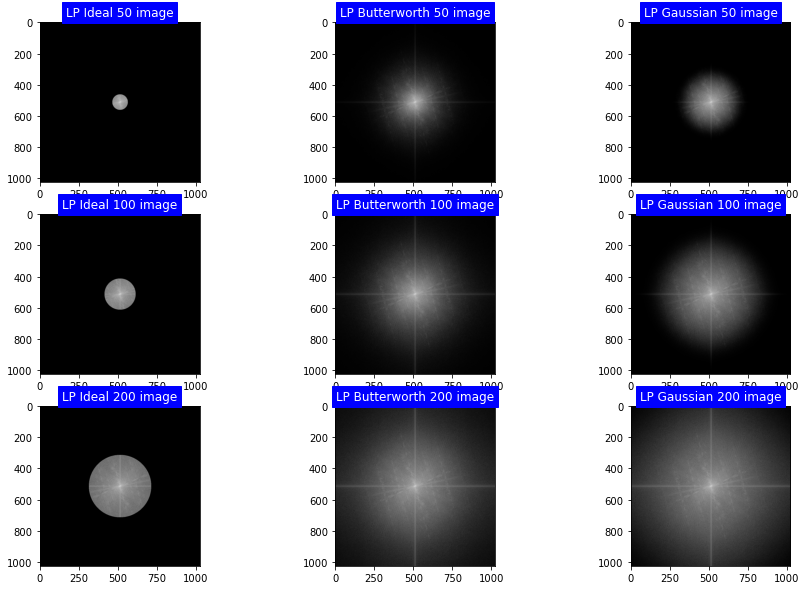

In [64]:
def log_abs(img):
    '''
    :param img: the image to be transformed
    :return the log scaled magnitude of the image
    '''
    magnitude = np.abs(img)
    log_magnitude = np.log(magnitude + 1)
    return log_magnitude

# Plot
fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(3, 3)

############### radius = 50
# LP ideal 
ax2 = fig.add_subplot(gs[0, 0])
ax2.imshow(log_abs(ideal_50), cmap='gray')
ax2.set_title('LP Ideal 50 image', color='white', backgroundcolor='blue')

# LP butterworth 
ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(log_abs(bw_50), cmap='gray')
ax2.set_title('LP Butterworth 50 image', color='white', backgroundcolor='blue')

# LP gaussian
ax2 = fig.add_subplot(gs[0, 2])
ax2.imshow(log_abs(gaussian_50), cmap='gray')
ax2.set_title('LP Gaussian 50 image', color='white', backgroundcolor='blue')

############### radius = 100
# LP ideal 
ax2 = fig.add_subplot(gs[1, 0])
ax2.imshow(log_abs(ideal_100), cmap='gray')
ax2.set_title('LP Ideal 100 image', color='white', backgroundcolor='blue')

# LP butterworth 
ax2 = fig.add_subplot(gs[1, 1])
ax2.imshow(log_abs(bw_100), cmap='gray')
ax2.set_title('LP Butterworth 100 image', color='white', backgroundcolor='blue')

# LP gaussian
ax2 = fig.add_subplot(gs[1, 2])
ax2.imshow(log_abs(gaussian_100), cmap='gray')
ax2.set_title('LP Gaussian 100 image', color='white', backgroundcolor='blue')

############### radius = 200
# LP ideal 
ax2 = fig.add_subplot(gs[2, 0])
ax2.imshow(log_abs(ideal_200), cmap='gray')
ax2.set_title('LP Ideal 200 image', color='white', backgroundcolor='blue')

# LP butterworth 
ax2 = fig.add_subplot(gs[2, 1])
ax2.imshow(log_abs(bw_200), cmap='gray')
ax2.set_title('LP Butterworth 200 image', color='white', backgroundcolor='blue')

# LP gaussian
ax2 = fig.add_subplot(gs[2, 2])
ax2.imshow(log_abs(gaussian_200), cmap='gray')
ax2.set_title('LP Gaussian 200 image', color='white', backgroundcolor='blue')

plt.show()

### Apply filters to images

In [65]:
ideal_50_image = np.abs(inverse_fourier_trans(ideal_50))
bw_50_image = np.abs(inverse_fourier_trans(bw_50))
gaussian_50_image = np.abs(inverse_fourier_trans(gaussian_50))

ideal_100_image = np.abs(inverse_fourier_trans(ideal_100))
bw_100_image = np.abs(inverse_fourier_trans(bw_100))
gaussian_100_image = np.abs(inverse_fourier_trans(gaussian_100))

ideal_200_image = np.abs(inverse_fourier_trans(ideal_200))
bw_200_image = np.abs(inverse_fourier_trans(bw_200))
gaussian_200_image = np.abs(inverse_fourier_trans(gaussian_200))

##### Display results

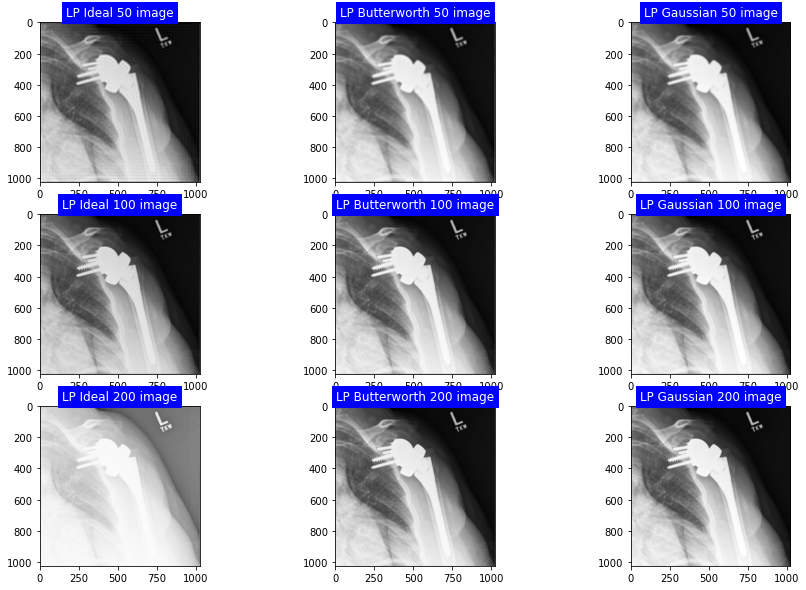

In [66]:
# Plot
fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(3, 3)

############### radius = 50
# LP ideal 
ax2 = fig.add_subplot(gs[0, 0])
ax2.imshow(ideal_50_image, cmap='gray')
ax2.set_title('LP Ideal 50 image', color='white', backgroundcolor='blue')

# LP butterworth 
ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(bw_50_image, cmap='gray')
ax2.set_title('LP Butterworth 50 image', color='white', backgroundcolor='blue')

# LP gaussian
ax2 = fig.add_subplot(gs[0, 2])
ax2.imshow(gaussian_50_image, cmap='gray')
ax2.set_title('LP Gaussian 50 image', color='white', backgroundcolor='blue')

############### radius = 100
# LP ideal 
ax2 = fig.add_subplot(gs[1, 0])
ax2.imshow(ideal_100_image, cmap='gray')
ax2.set_title('LP Ideal 100 image', color='white', backgroundcolor='blue')

# LP butterworth 
ax2 = fig.add_subplot(gs[1, 1])
ax2.imshow(bw_100_image, cmap='gray')
ax2.set_title('LP Butterworth 100 image', color='white', backgroundcolor='blue')

# LP gaussian
ax2 = fig.add_subplot(gs[1, 2])
ax2.imshow(gaussian_100_image, cmap='gray')
ax2.set_title('LP Gaussian 100 image', color='white', backgroundcolor='blue')

############### radius = 200
# LP ideal 
ax2 = fig.add_subplot(gs[2, 0])
ax2.imshow(log_abs(ideal_200_image), cmap='gray')
ax2.set_title('LP Ideal 200 image', color='white', backgroundcolor='blue')

# LP butterworth 
ax2 = fig.add_subplot(gs[2, 1])
ax2.imshow(bw_200_image, cmap='gray')
ax2.set_title('LP Butterworth 200 image', color='white', backgroundcolor='blue')

# LP gaussian
ax2 = fig.add_subplot(gs[2, 2])
ax2.imshow(gaussian_200_image, cmap='gray')
ax2.set_title('LP Gaussian 200 image', color='white', backgroundcolor='blue')

plt.show()

As observed from the results, the larger the filter radius, the more frequencies it allows to pass through. Additionally, the difference between these filters lies in their softening effects on the image. From left to right, the filters operate increasingly smoothly, resulting in fewer image distortions.

#### High-pass filters

In [67]:
# radius = 50
ideal_50 = apply_filters(shoulder_img, 'HP_ideal', 50)*fourier_img
bw_50 = apply_filters(shoulder_img, 'HP_butterworth', 50, n=2)*fourier_img
gaussian_50 = apply_filters(shoulder_img, 'HP_gaussian', 50)*fourier_img

# radius = 100
ideal_100 = apply_filters(shoulder_img, 'HP_ideal', 100)*fourier_img
bw_100 = apply_filters(shoulder_img, 'HP_butterworth', 100, n=2)*fourier_img
gaussian_100 = apply_filters(shoulder_img, 'HP_gaussian', 100)*fourier_img

# radius = 200
ideal_200 = apply_filters(shoulder_img, 'HP_ideal', 200)*fourier_img
bw_200 = apply_filters(shoulder_img, 'HP_butterworth', 200, n=2)*fourier_img
gaussian_200 = apply_filters(shoulder_img, 'HP_gaussian', 200)*fourier_img

#### Apply filters to images

In [68]:
ideal_50_image = np.abs(inverse_fourier_trans(ideal_50))
bw_50_image = np.abs(inverse_fourier_trans(bw_50))
gaussian_50_image = np.abs(inverse_fourier_trans(gaussian_50))

ideal_100_image = np.abs(inverse_fourier_trans(ideal_100))
bw_100_image = np.abs(inverse_fourier_trans(bw_100))
gaussian_100_image = np.abs(inverse_fourier_trans(gaussian_100))

ideal_200_image = np.abs(inverse_fourier_trans(ideal_200))
bw_200_image = np.abs(inverse_fourier_trans(bw_200))
gaussian_200_image = np.abs(inverse_fourier_trans(gaussian_200))

##### Display results

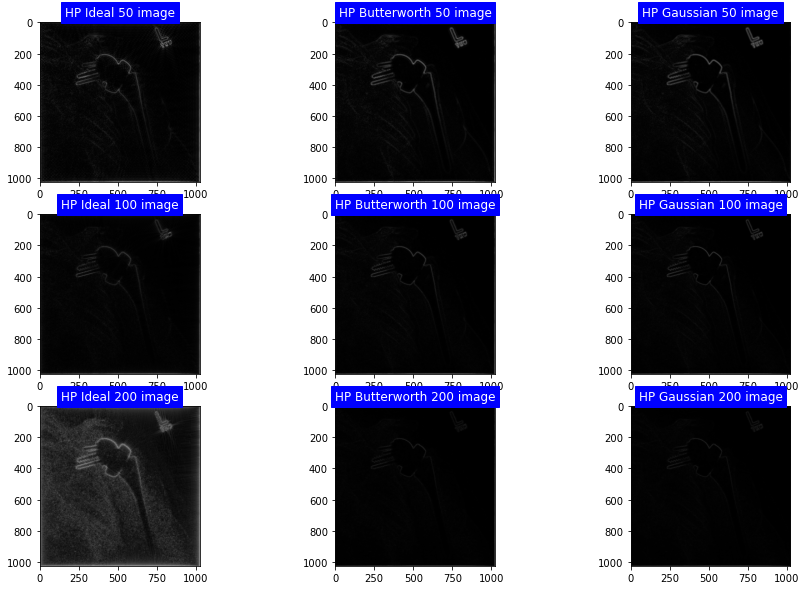

In [69]:
# Plot
fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(3, 3)

############### radius = 50
# LP ideal 
ax2 = fig.add_subplot(gs[0, 0])
ax2.imshow(ideal_50_image, cmap='gray')
ax2.set_title('HP Ideal 50 image', color='white', backgroundcolor='blue')

# LP butterworth 
ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(bw_50_image, cmap='gray')
ax2.set_title('HP Butterworth 50 image', color='white', backgroundcolor='blue')

# LP gaussian
ax2 = fig.add_subplot(gs[0, 2])
ax2.imshow(gaussian_50_image, cmap='gray')
ax2.set_title('HP Gaussian 50 image', color='white', backgroundcolor='blue')

############### radius = 100
# LP ideal 
ax2 = fig.add_subplot(gs[1, 0])
ax2.imshow(ideal_100_image, cmap='gray')
ax2.set_title('HP Ideal 100 image', color='white', backgroundcolor='blue')

# LP butterworth 
ax2 = fig.add_subplot(gs[1, 1])
ax2.imshow(bw_100_image, cmap='gray')
ax2.set_title('HP Butterworth 100 image', color='white', backgroundcolor='blue')

# LP gaussian
ax2 = fig.add_subplot(gs[1, 2])
ax2.imshow(gaussian_100_image, cmap='gray')
ax2.set_title('HP Gaussian 100 image', color='white', backgroundcolor='blue')

############### radius = 200
# LP ideal 
ax2 = fig.add_subplot(gs[2, 0])
ax2.imshow(log_abs(ideal_200_image), cmap='gray')
ax2.set_title('HP Ideal 200 image', color='white', backgroundcolor='blue')

# LP butterworth 
ax2 = fig.add_subplot(gs[2, 1])
ax2.imshow(bw_200_image, cmap='gray')
ax2.set_title('HP Butterworth 200 image', color='white', backgroundcolor='blue')

# LP gaussian
ax2 = fig.add_subplot(gs[2, 2])
ax2.imshow(gaussian_200_image, cmap='gray')
ax2.set_title('HP Gaussian 200 image', color='white', backgroundcolor='blue')

plt.show()

Clearly, as the radius increases, almost nothing passes through the Butterworth and Gaussian filters due to their high-pass nature. In the case of the ideal filter, its lack of smoothness allows it to display more intense details even at higher radii.